In [92]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [93]:
path = '/content/Tweets.csv'
df = pd.read_csv(path)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [94]:
df.shape

(14640, 15)

In [95]:
df.info

<bound method DataFrame.info of            tweet_id airline_sentiment  airline_sentiment_confidence  \
0      5.703060e+17           neutral                        1.0000   
1      5.703010e+17          positive                        0.3486   
2      5.703010e+17           neutral                        0.6837   
3      5.703010e+17          negative                        1.0000   
4      5.703010e+17          negative                        1.0000   
...             ...               ...                           ...   
14635  5.695880e+17          positive                        0.3487   
14636  5.695870e+17          negative                        1.0000   
14637  5.695870e+17           neutral                        1.0000   
14638  5.695870e+17          negative                        1.0000   
14639  5.695870e+17           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN          

In [96]:
df.duplicated().sum()

36

In [97]:
df = df.drop_duplicates(keep='first')

In [98]:
df.duplicated().sum()

0

In [99]:
df.shape

(14604, 15)

In [100]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [101]:
df = df[df['airline_sentiment'] != 'neutral']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
5,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
6,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,24-02-2015 11:13,San Francisco CA,Pacific Time (US & Canada)


In [102]:
def label_spam(tweet):
    keywords = ['offer', 'free', 'discount', 'win', 'winner', 'limited', 'time', 'today', 'buy', 'purchase', 'sale', 'click', 'act', 'now', 'money', 'cash']
    
    for keyword in keywords:
        if keyword in tweet:
            return 'spam'
    
    return 'not spam'

df['label'] = df['text'].apply(label_spam)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,label
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada),not spam
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada),not spam
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada),not spam
5,5.703010e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada),not spam
6,5.703010e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,24-02-2015 11:13,San Francisco CA,Pacific Time (US & Canada),spam


In [103]:
cols_to_drop = ['tweet_id', 'airline_sentiment_confidence', 'negativereason', 
                'negativereason_confidence', 'airline', 'airline_sentiment_gold',
                'name', 'negativereason_gold', 'tweet_coord', 'tweet_created',
                'tweet_location', 'user_timezone']
df = df.drop(cols_to_drop, axis=1)

In [104]:
df.head()

,airline_sentiment,retweet_count,text,label
1,positive,0,@VirginAmerica plus you've added commercials to the experience... tacky.,not spam
3,negative,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",not spam
4,negative,0,@VirginAmerica and it's a really big bad thing about it,not spam
5,negative,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,not spam
6,positive,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",spam


In [105]:
df.shape

(11513, 4)

In [106]:
df.drop('airline_sentiment', axis=1, inplace=True)

In [107]:
df.head()

,retweet_count,text,label
1,0,@VirginAmerica plus you've added commercials to the experience... tacky.,not spam
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",not spam
4,0,@VirginAmerica and it's a really big bad thing about it,not spam
5,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,not spam
6,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",spam


In [108]:
df.tail()

,retweet_count,text,label
14633,0,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.",not spam
14634,0,@AmericanAir right on cue with the delays👌,not spam
14635,0,@AmericanAir thank you we got on a different flight to Chicago.,not spam
14636,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,not spam
14638,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",spam


In [109]:
pd.set_option('display.max_colwidth', 900)
df.head()

,retweet_count,text,label
1,0,@VirginAmerica plus you've added commercials to the experience... tacky.,not spam
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",not spam
4,0,@VirginAmerica and it's a really big bad thing about it,not spam
5,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,not spam
6,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",spam


In [110]:
df['label'].value_counts()

not spam    8611
spam        2902
Name: label, dtype: int64

In [111]:
df.tail()

,retweet_count,text,label
14633,0,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.",not spam
14634,0,@AmericanAir right on cue with the delays👌,not spam
14635,0,@AmericanAir thank you we got on a different flight to Chicago.,not spam
14636,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,not spam
14638,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",spam


In [112]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

def preprocess_tweet(tweet):
    # remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    tweet = re.sub(r'@\w+', '', tweet)
    
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    tweet = tweet.lower()
    
    tokens = nltk.word_tokenize(tweet)
    processed_tokens = [stemmer.stem(token) for token in tokens if token not in stopwords]
    
    processed_tweet = ' '.join(processed_tokens)
    
    return processed_tweet

df['processed_text'] = df['text'].apply(preprocess_tweet)

In [113]:
pd.set_option('display.max_colwidth', 900)
df[['processed_text']].head()

,processed_text
1,plu youv ad commerci experi tacki
3,realli aggress blast obnoxi entertain guest face amp littl recours
4,realli big bad thing
5,serious would pay 30 flight seat didnt play realli bad thing fli va
6,ye nearli everi time fli vx “ ear worm ” ’ go away


In [114]:
df.tail()

,retweet_count,text,label,processed_text
14633,0,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.",not spam,flight cancel flightl leav tomorrow morn auto rebook tuesday night flight need arriv monday
14634,0,@AmericanAir right on cue with the delays👌,not spam,right cue delays👌
14635,0,@AmericanAir thank you we got on a different flight to Chicago.,not spam,thank got differ flight chicago
14636,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,not spam,leav 20 minut late flight warn commun 15 minut late flight that call shitti custom svc
14638,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",spam,money chang flight dont answer phone suggest make commit


In [115]:
encode = LabelEncoder()
df['label'] = encode.fit_transform(df['label'])

In [116]:
df.head()

,retweet_count,text,label,processed_text
1,0,@VirginAmerica plus you've added commercials to the experience... tacky.,0,plu youv ad commerci experi tacki
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0,realli aggress blast obnoxi entertain guest face amp littl recours
4,0,@VirginAmerica and it's a really big bad thing about it,0,realli big bad thing
5,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,0,serious would pay 30 flight seat didnt play realli bad thing fli va
6,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1,ye nearli everi time fli vx “ ear worm ” ’ go away


In [117]:
df.drop('text', axis=1, inplace=True)

In [118]:
df.head()

,retweet_count,label,processed_text
1,0,0,plu youv ad commerci experi tacki
3,0,0,realli aggress blast obnoxi entertain guest face amp littl recours
4,0,0,realli big bad thing
5,0,0,serious would pay 30 flight seat didnt play realli bad thing fli va
6,0,1,ye nearli everi time fli vx “ ear worm ” ’ go away


In [119]:
df.drop('retweet_count', axis=1, inplace=True)
df.head()

,label,processed_text
1,0,plu youv ad commerci experi tacki
3,0,realli aggress blast obnoxi entertain guest face amp littl recours
4,0,realli big bad thing
5,0,serious would pay 30 flight seat didnt play realli bad thing fli va
6,1,ye nearli everi time fli vx “ ear worm ” ’ go away


In [120]:
X = df['processed_text']
y = df['label']

In [121]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
print(vectorizer.get_feature_names())
print(X.toarray())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0016', '0162389030167', '0162424965446', '0162431184663', '0214', '021mbp', '022015', '0223', '02282015', '03', '0303', '03032015', '0316', '0372389047497', '0400', '0510', '0600', '0638', '0671', '10', '100', '1000', '10000', '10000lb', '1000p', '1000pm', '1001', '1001pm', '1002', '1005pm', '1007', '1007p', '101', '1010', '101030', '1014am', '1015', '1015am', '1019', '102', '1020', '1020pm', '1027', '1028', '103', '1030', '1030a', '1030pm', '1032', '1035', '1038', '1039', '104', '1045', '1045pm', '1046', '105', '1050', '1050am', '1051', '1051pm', '1055', '1055pm', '106', '1071', '1074', '1079871763', '1080', '1081', '1086', '108639', '1099', '10a', '10am', '10f', '10hour', '10hr', '10m', '10min', '10minut', '10p', '10pm', '10th', '10voucherwhatajok', '10x', '10yr', '11', '110', '1100', '1100pm', '1101', '1106', '1108', '1109', '1110p', '1114', '1115', '1115p', '1117', '112', '1120', '1120am', '1121p', '1123', '1130', '1130a', '1130am', '1130pm', '1131', '1135', '1136', '1137', '1138

In [122]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

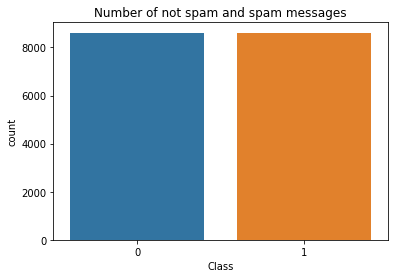

In [123]:
df_resampled = pd.DataFrame({'processed_text': X_resampled, 'label': y_resampled})
sns.countplot(x='label', data=df_resampled)
plt.xlabel('Class')
plt.title('Number of not spam and spam messages');

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Accuracy: 0.8746381007527504


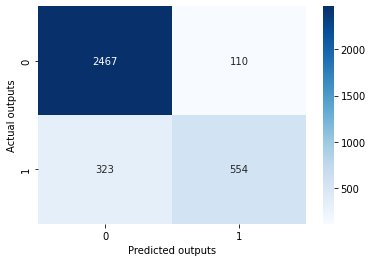

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2577
           1       0.83      0.63      0.72       877

    accuracy                           0.87      3454
   macro avg       0.86      0.79      0.82      3454
weighted avg       0.87      0.87      0.87      3454



In [125]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted outputs')
plt.ylabel('Actual outputs')
plt.show()
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7698320787492762


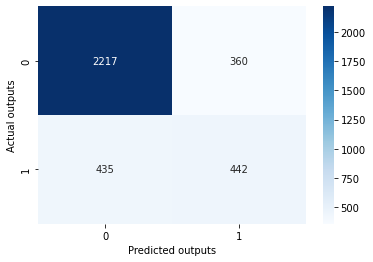

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2577
           1       0.55      0.50      0.53       877

    accuracy                           0.77      3454
   macro avg       0.69      0.68      0.69      3454
weighted avg       0.76      0.77      0.77      3454



In [126]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
y_pred1 = svc.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted outputs')
plt.ylabel('Actual outputs')
plt.show()
report1 = classification_report(y_test, y_pred1)
print(report1)

Accuracy: 0.9203821656050956


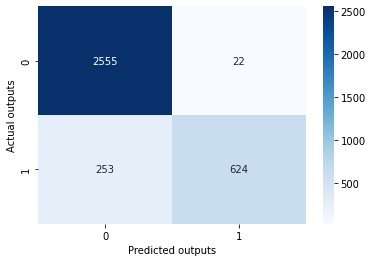

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2577
           1       0.97      0.71      0.82       877

    accuracy                           0.92      3454
   macro avg       0.94      0.85      0.88      3454
weighted avg       0.92      0.92      0.92      3454



In [127]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred2 = rfc.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted outputs')
plt.ylabel('Actual outputs')
plt.show()
report2 = classification_report(y_test, y_pred2)
print(report2)

Accuracy: 0.9067747539085119


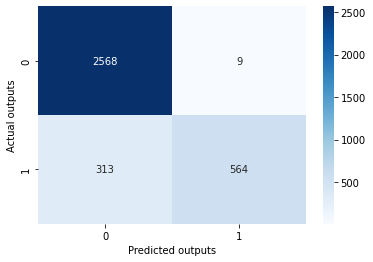

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2577
           1       0.98      0.64      0.78       877

    accuracy                           0.91      3454
   macro avg       0.94      0.82      0.86      3454
weighted avg       0.91      0.91      0.90      3454



In [128]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred4 = xgb.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)
cm4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(cm4, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted outputs')
plt.ylabel('Actual outputs')
plt.show()
report4 = classification_report(y_test, y_pred4)
print(report4)

In [132]:
new_review = ["@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"]

new_review_vec = vectorizer.transform(new_review)
new_review_pred = rfc.predict(new_review_vec)
if new_review_pred == 1:
    print("The model predicts that the review is  spam.")
else:
    print("The model predicts that the review is not spam.")


The model predicts that the review is  spam.


In [ ]:
with open('cv.pkl', 'wb') as file:
    pickle.dump(cv, file)

In [ ]:
with open('spam_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)